Q1.

Image convolution takes an image and a filter/kernel as input. And any linear, shift-invariant operator can be represented as a convolution. It's the response of one function when subjected to another function. For the transformation, for a pixel of the modified image, for each filter window on it, it dertermines the center pixel's value by multiplying its original value and all neighbor pixel's value of the input image with the filter matrix, and then adding the weighted values of all its neighbors. And in the end, it would ouput a filtered image that's been modified.It's useful as it could multiply 2 arrays of different sizes and same dimensionality, and the produce a new array with the same dimensionality and different features.

Q2.

For starter, the equation for correlation is h[m, n] = Σf[k, l]I[m + k, n + l]. 
And the equation for convolution is h[m, n] = Σf[k,l]I[m - k, n - l].
Convolution is the same as correlation with a 180˚ rotated filter kernel, and when the filter kernel is symmetric, these 2 are identical. And convolution is associative but correlation is not. Also, Correlation is a measure of similarity between 2 signals, while convolution is the response of one function when subjected to another function, or, a measure of effect of one signal on the other.

In [17]:
from skimage import io
from skimage import color
from skimage import img_as_ubyte
from skimage.transform import rescale, resize
from scipy.ndimage import convolve
from scipy.ndimage import correlate
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import time

img = io.imread('RISDance.jpg')
img = img_as_ubyte(img)
img_gray = color.rgb2gray(img)

(2160, 3840, 3)

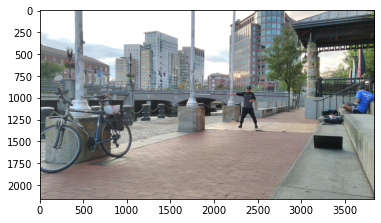

In [2]:
plt.imshow(img)
img.shape

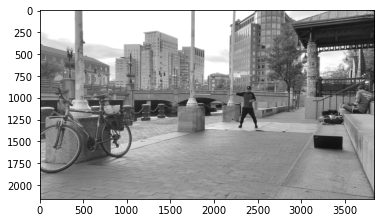

In [3]:
plt.imshow(img_gray, cmap='gray')

In [4]:
shift = np.zeros((155,155))
shift[77,154] = 1 # This is a shift filter, it's not symmetric

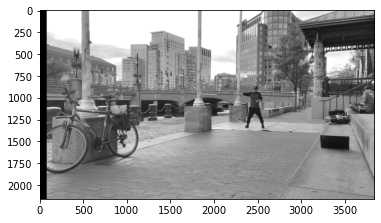

In [6]:
result = convolve(img_gray, shift, mode='constant', cval=0.0)
plt.imshow(result, cmap='gray')

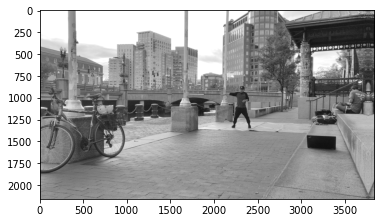

In [7]:
result_corr = correlate(img_gray, shift)
plt.imshow(result_corr, cmap='gray')

Q3.
A low-pass filter is smoothing filter, and an example of low-pass filter is the Gaussian filter, it pass through lower frequencies while attenuating higher frequencies.


And high-pass filter can be used for sharpening the image, it pass through higher frequencies while attenuating lower frequencies.

In [11]:
low_pass = np.array([[1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9]])#This is a smoothing filter
high_pass = np.array(([-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]), dtype="int")# This is sobel filter, but also a high-pass filter

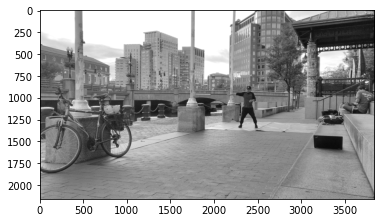

In [12]:
low_result = convolve(img_gray, low_pass)
plt.imshow(low_result, cmap='gray')

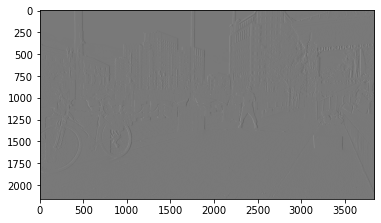

In [15]:
high_result = convolve(img_gray, high_pass)
plt.imshow(high_result, cmap='gray')

Q4.

In [19]:
image25 = rescale(img_gray, 0.175) # Image of size 0.25 Megapixel
image3 = rescale(img_gray, 0.63) # Image of size 3 Megapixel
image5 = rescale(img_gray, 0.8) # Image of size 5 Megapixel
image8 = img_gray # Image of size 8 Megapixel

In [20]:
conv_matrix = np.zeros((7, 4))#(y,x) where y is filter size and x is image size
corr_matrix = np.zeros((7, 4))

In [21]:
for i in range(3, 16, 2):
  kernel_size = i
  filter = np.zeros((kernel_size, kernel_size))
  filter[:,:] = 1/9
  #print("Using filter with size {}.".format(kernel_size))

  start_time = time.time()
  result1 = convolve(image25, filter)
  end_time = time.time()
  conv_matrix[3*(i//2) - i][0] = end_time - start_time

  start_time = time.time()
  result2 = convolve(image3, filter)
  end_time = time.time()
  conv_matrix[3*(i//2) - i][1] = end_time - start_time

  start_time = time.time()
  result3 = convolve(image5, filter)
  end_time = time.time()
  conv_matrix[3*(i//2) - i][2] = end_time - start_time

  start_time = time.time()
  result4 = convolve(image8, filter)
  end_time = time.time()
  conv_matrix[3*(i//2) - i][3] = end_time - start_time

In [22]:
conv_matrix

array([[0.00200033, 0.02300549, 0.03700781, 0.05601287],
       [0.00500107, 0.05201173, 0.08501911, 0.13102937],
       [0.00800157, 0.09502149, 0.16503739, 0.24005389],
       [0.0140028 , 0.18204117, 0.32307267, 0.45810342],
       [0.02200508, 0.27706242, 0.47510648, 0.70215845],
       [0.03000617, 0.39208817, 0.65014696, 1.00222516],
       [0.04100895, 0.52312732, 0.8651948 , 1.34029245]])

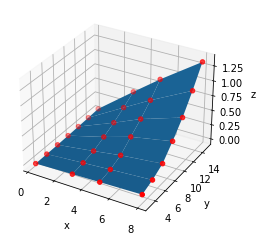

In [27]:
x = [0.25, 3, 5, 8]
y = [3,5,7,9,11,13,15]
data = conv_matrix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, data)
ax.scatter(X,Y,data, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [24]:
for i in range(3, 16, 2):
  kernel_size = i
  filter = np.zeros((kernel_size, kernel_size))
  filter[:,:] = 1/9
  #print("Using filter with size {}.".format(kernel_size))

  start_time = time.time()
  result1 = correlate(image25, filter)
  end_time = time.time()
  corr_matrix[3*(i//2) - i][0] = end_time - start_time

  start_time = time.time()
  result2 = correlate(image3, filter)
  end_time = time.time()
  corr_matrix[3*(i//2) - i][1] = end_time - start_time

  start_time = time.time()
  result3 = correlate(image5, filter)
  end_time = time.time()
  corr_matrix[3*(i//2) - i][2] = end_time - start_time

  start_time = time.time()
  result4 = correlate(image8, filter)
  end_time = time.time()
  corr_matrix[3*(i//2) - i][3] = end_time - start_time

In [25]:
corr_matrix

array([[0.00300169, 0.02200389, 0.03800845, 0.0580132 ],
       [0.00400114, 0.05201125, 0.08401918, 0.13002896],
       [0.00800228, 0.09402132, 0.16603684, 0.23705339],
       [0.01500344, 0.18104053, 0.32107234, 0.45810318],
       [0.02100468, 0.27706242, 0.47410631, 0.69815731],
       [0.03000689, 0.39108777, 0.65114665, 1.00722671],
       [0.04100919, 0.52111697, 0.85920334, 1.34429264]])

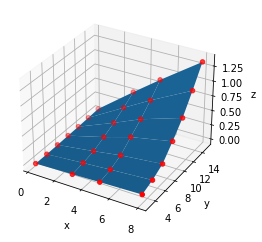

In [28]:
x = [0.25, 3, 5, 8]
y = [3,5,7,9,11,13,15]
data = corr_matrix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, data)
ax.scatter(X,Y,data, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

The results does match my expectations given the number of multiply and add operations
in convolutions, as the image gets larger, and filter gets larger, the time it takes is longer.